# Лабораторная работа №5: Линейная регрессия

6132 Макарова Мария Константиновна Датасет: https://www.kaggle.com/datasets/erdemtaha/cancer-data?resource=download

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

1. Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.
   > Датасет должен содержать как минимум количественные признаки. Если категориальных нет, то пропустить пункты с временным убиранием категориальных признаков. Желательно наличие обоих типов признаков в датасете.

In [120]:
data = pd.read_csv('cancer_data.csv')

2. Датасет и подготовка данных, этап 1:
   - Привести описание датасета.
   - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".
   - Нормализовать численные данные.
   - Визуализировать `heatmap`-матрицу кореллированности признаков.
   - Визуализировать взаимосвязь между `target`-переменной и каждым из признаком (с использованием `srs.pairplot` или `pandas.plotting.scatter_matrix`). Лучше всего построить диаграмму попарного распределения между таргетом и каждым из признаков отдельно (пример с `sns.FacetGrid` в лекции).
   - Разбить выборку на обучающую и тестовую.
     > Из датафреймов обучающей и тестовой выборки необходимо временно убрать категориальные признаки (исходные датафреймы сохранить для 2 этапа).


In [121]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [123]:
data = data.drop('Unnamed: 32',axis=1)
description_list = [
    "Уникальный идентификатор пациента",
    "Диагноз опухоли: M — злокачественная, B — доброкачественная",
    "Среднее значение радиуса ядра опухоли",
    "Среднее значение текстурности (изменчивость интенсивности) опухоли",
    "Среднее значение периметра ядра опухоли",
    "Среднее значение площади ядра опухоли",
    "Среднее значение гладкости (однородности) границ",
    "Среднее значение компактности (сравнение периметра и площади)",
    "Среднее значение вогнутости (глубина вогнутых частей контура)",
    "Среднее значение количества вогнутых точек на контуре",
    "Среднее значение симметрии образования",
    "Среднее значение фрактальной размерности (показатель сложности границы)",
    "Стандартное отклонение радиуса",
    "Стандартное отклонение текстурности",
    "Стандартное отклонение периметра",
    "Стандартное отклонение площади",
    "Стандартное отклонение гладкости",
    "Стандартное отклонение компактности",
    "Стандартное отклонение вогнутости",
    "Стандартное отклонение количества вогнутых точек",
    "Стандартное отклонение симметрии",
    "Стандартное отклонение фрактальной размерности",
    "Наибольшее значение радиуса",
    "Наибольшее значение текстурности",
    "Наибольшее значение периметра",
    "Наибольшее значение площади",
    "Наибольшее значение гладкости",
    "Наибольшее значение компактности",
    "Наибольшее значение вогнутости",
    "Наибольшее значение количества вогнутых точек",
    "Наибольшее значение симметрии",
    "Наибольшее значение фрактальной размерности"
]
dtypes_column = data.dtypes
df_info = pd.DataFrame({'Тип': dtypes_column, 'Описание': description_list})
pd.set_option('display.max_colwidth', None)
df_info

,Тип,Описание
id,int64,Уникальный идентификатор пациента
diagnosis,object,"Диагноз опухоли: M — злокачественная, B — доброкачественная"
radius_mean,float64,Среднее значение радиуса ядра опухоли
texture_mean,float64,Среднее значение текстурности (изменчивость интенсивности) опухоли
perimeter_mean,float64,Среднее значение периметра ядра опухоли
area_mean,float64,Среднее значение площади ядра опухоли
smoothness_mean,float64,Среднее значение гладкости (однородности) границ
compactness_mean,float64,Среднее значение компактности (сравнение периметра и площади)
concavity_mean,float64,Среднее значение вогнутости (глубина вогнутых частей контура)
concave points_mean,float64,Среднее значение количества вогнутых точек на контуре


In [124]:
data['diagnosis'] = data['diagnosis'].map({'M': 0, 'B': 1}) #заменяем категориальные признаки

In [125]:
data = data.drop('id',axis=1)
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

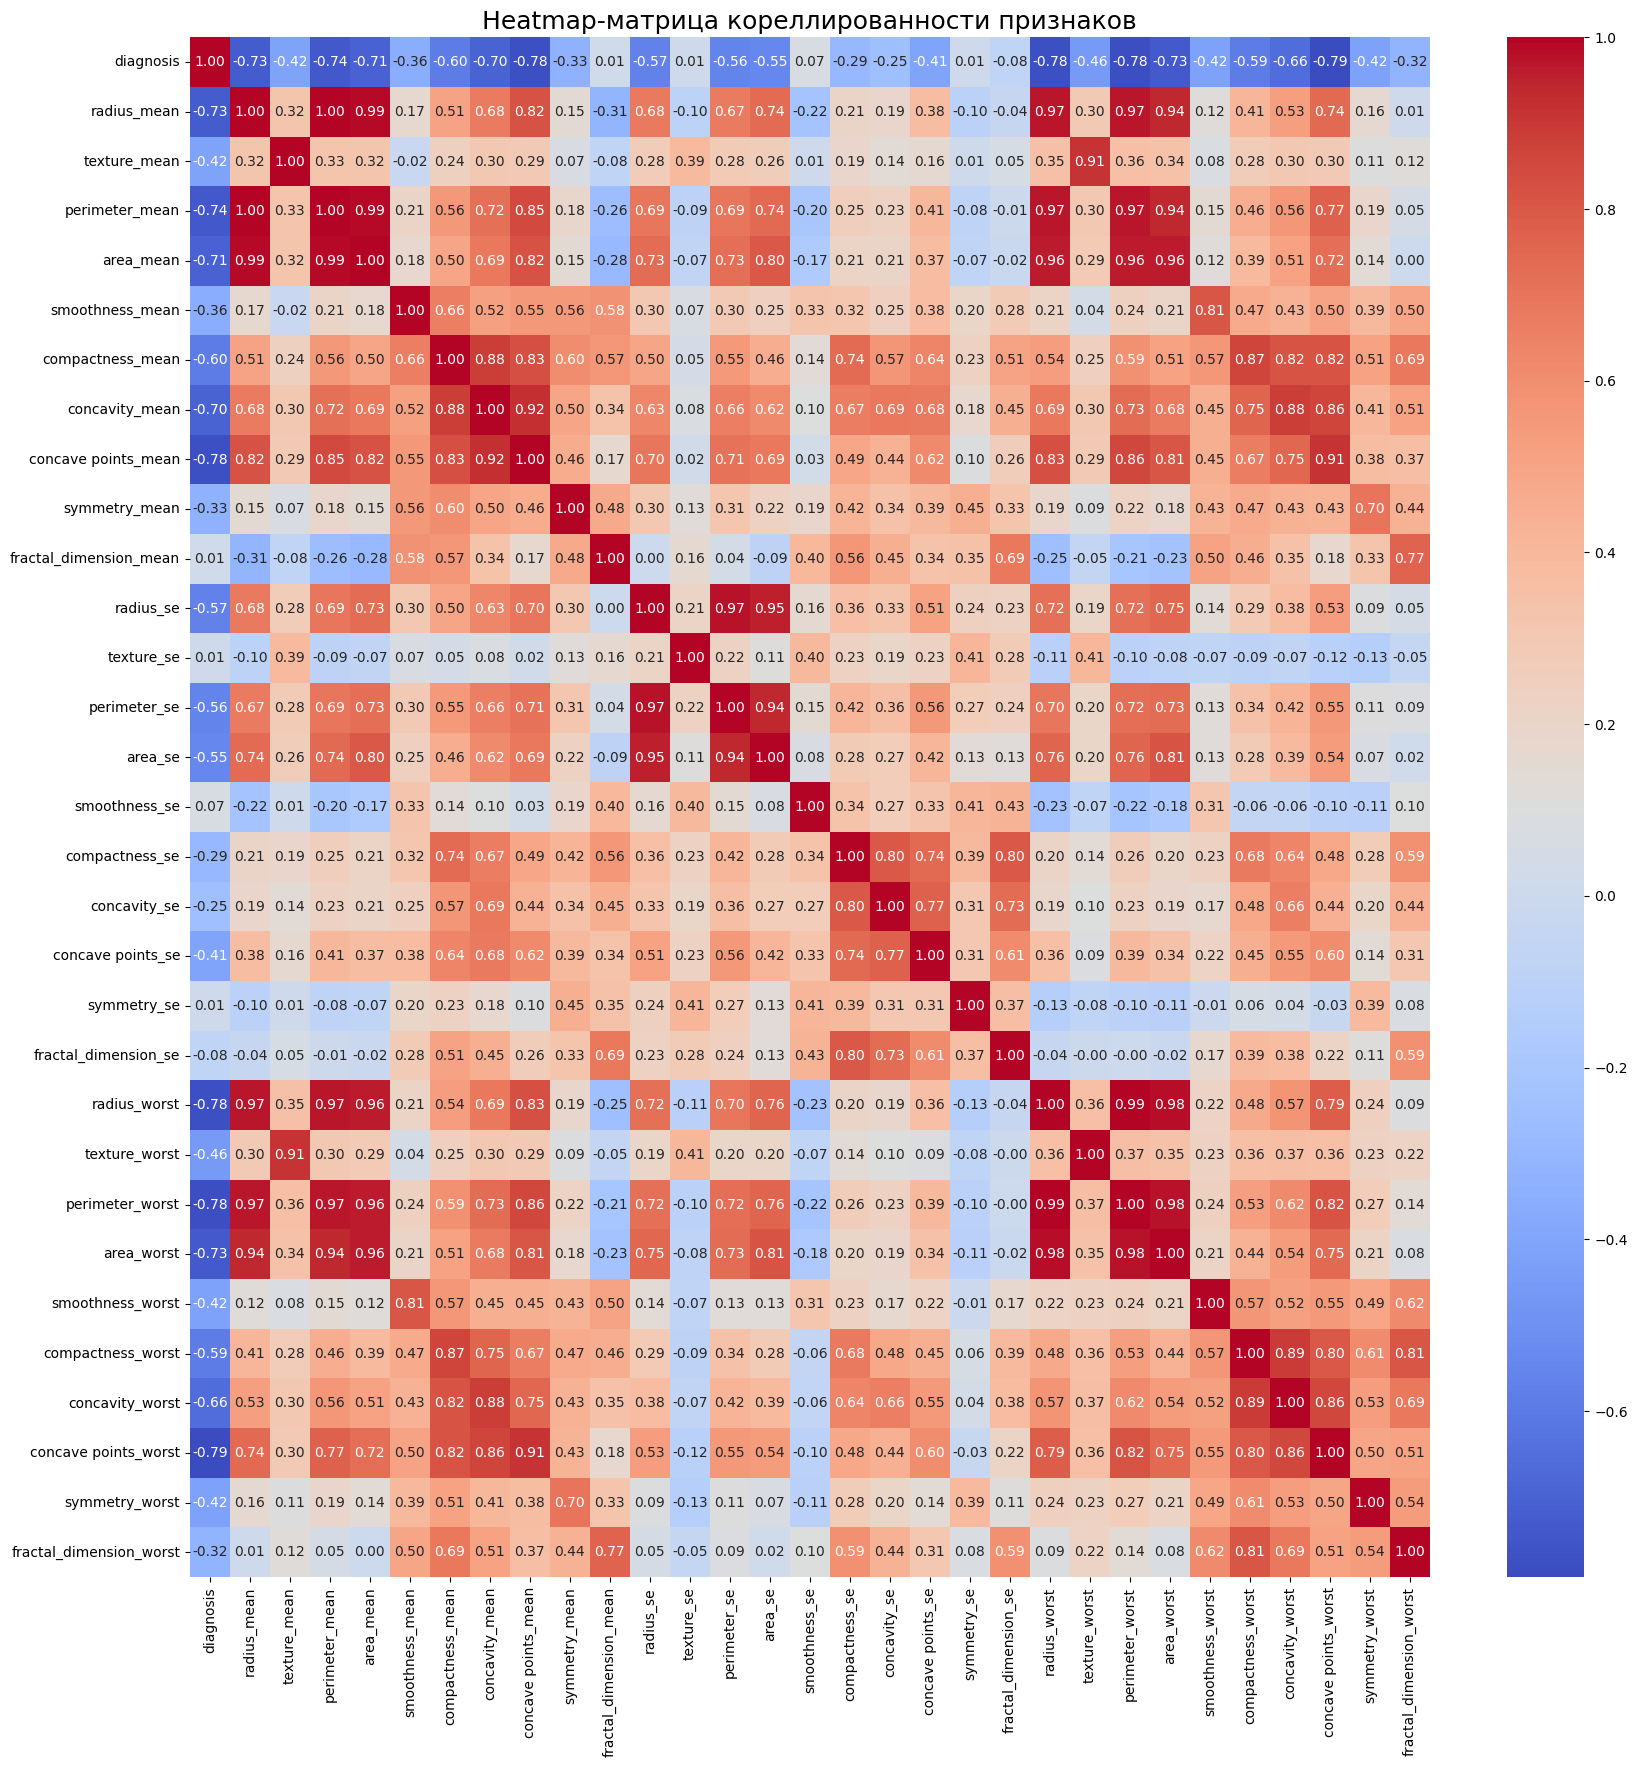

In [126]:
corr_matrix = data_scaled.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap-матрицa кореллированности признаков', fontsize=18)
plt.show()

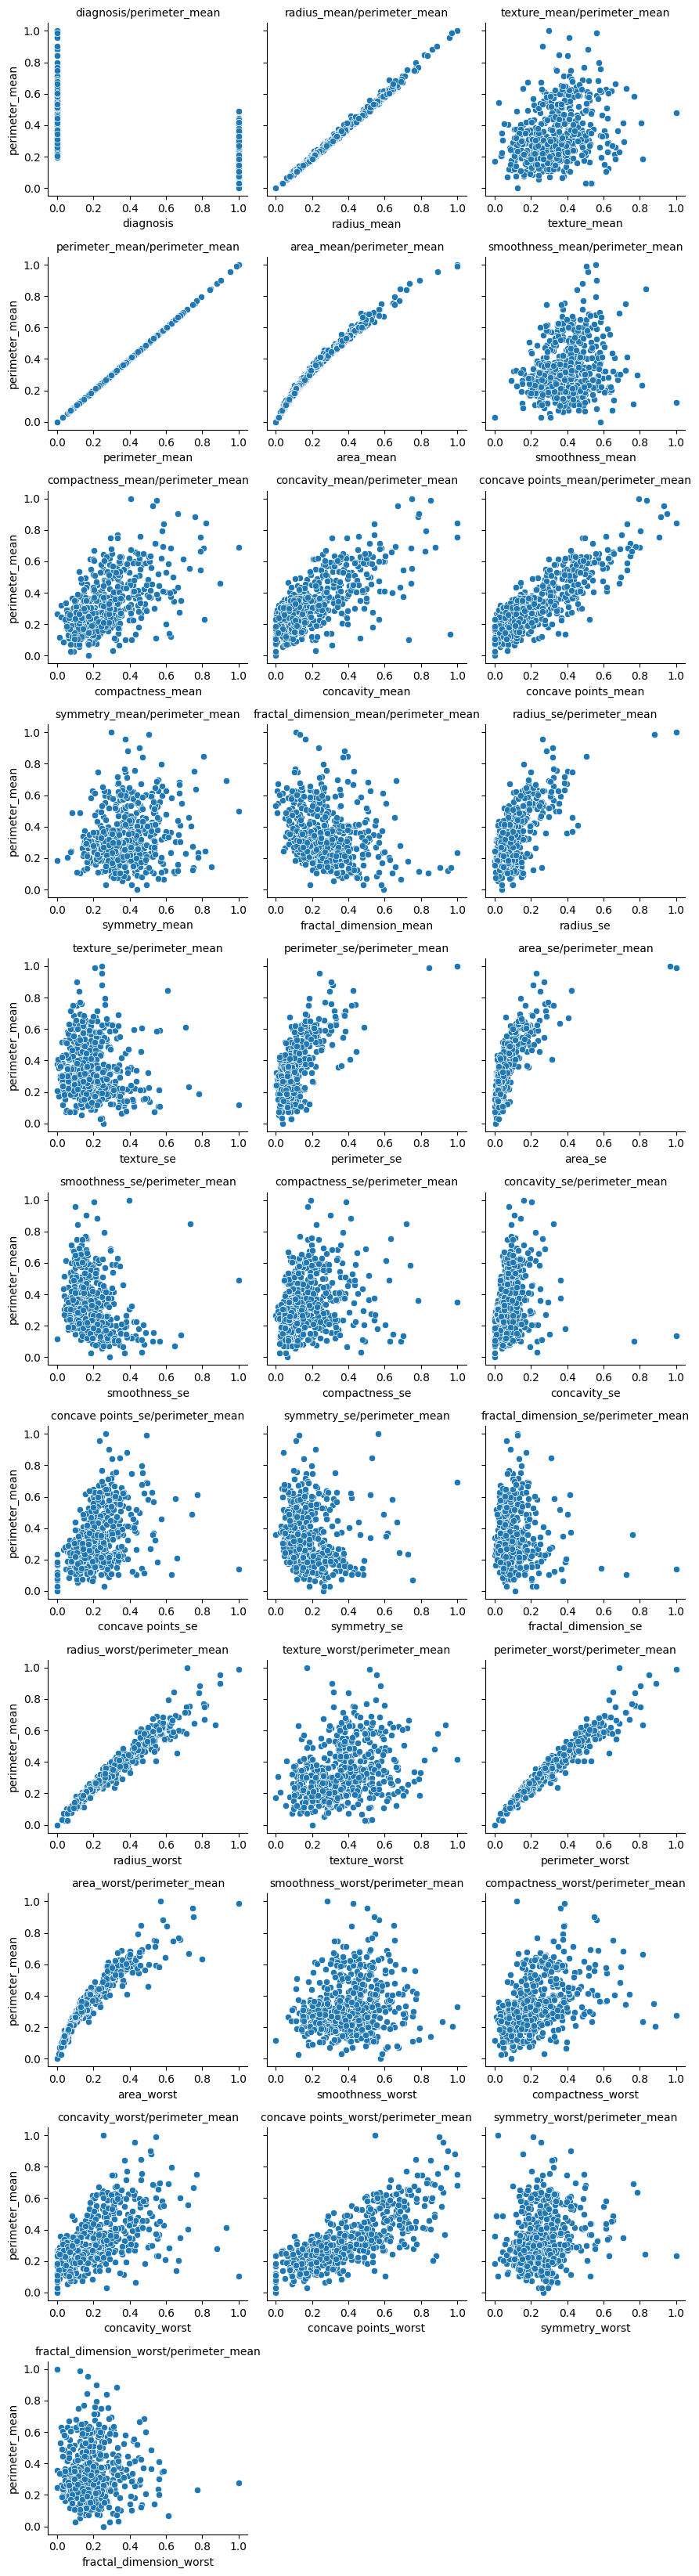

In [127]:
target = 'perimeter_mean'
fig = sns.FacetGrid(pd.DataFrame(list(data_scaled.columns.values)), col = 0, col_wrap=3, sharex=False)
for ax, varx in zip(fig.axes, list(data_scaled.columns.values)):
    sns.scatterplot(data=data_scaled, x=varx, y=target, ax=ax)
    ax.set_title(f'{varx}/{target}', fontsize=10)
fig.tight_layout()

In [128]:
X_cat = data_scaled.drop(columns = ['perimeter_mean'])
X = data_scaled.drop(columns=['diagnosis', 'perimeter_mean'])
y = data_scaled['perimeter_mean']

X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size = 0.2, random_state = 42)
X_train = X_train_cat.drop(columns=['diagnosis'])
X_test = X_test_cat.drop(columns=['diagnosis'])
print(f"Тренировочная выборка имеет {X_train.shape[0]} экземпляров и {X_train.shape[1]} признаков\nЧисло разных классов {np.bincount(y_train)}")
print(f"Тестовая выборка имеет {X_test.shape[0]} экземпляров и {X_test.shape[1]} признаков\nЧисло разных классов {np.bincount(y_test)}")

Тренировочная выборка имеет 455 экземпляров и 29 признаков
Число разных классов [454   1]
Тестовая выборка имеет 114 экземпляров и 29 признаков
Число разных классов [114]


3. Регрессия МНК:
   - Обучить модель линейной регрессии `LinearRegression`.
   - Вывести метрики $MSE$, $MAE$ и $R^2$ на тестовом наборе.
   - Вывести `model.coef_` и `model.intercept_`.
   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).


In [129]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"R^2: {r2:.6f}")

best_models_metrics = {}
best_models_metrics['LinearRegression'] = {
        "mse": mse,
        "mae": mae,
        "r2": r2}

MSE: 0.000012
MAE: 0.002129
R^2: 0.999574


In [130]:
print("Коэффициенты модели:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.6f}")

print(f"\nСвободный член (intercept_): {model.intercept_:.6f}")

Коэффициенты модели:
radius_mean: 0.923094
texture_mean: 0.004872
area_mean: 0.031701
smoothness_mean: -0.006864
compactness_mean: 0.068842
concavity_mean: 0.032130
concave points_mean: 0.000558
symmetry_mean: -0.002847
fractal_dimension_mean: -0.012438
radius_se: -0.030189
texture_se: 0.002915
perimeter_se: 0.018551
area_se: 0.021930
smoothness_se: -0.003545
compactness_se: 0.002278
concavity_se: -0.032516
concave points_se: 0.002359
symmetry_se: -0.005117
fractal_dimension_se: 0.008429
radius_worst: -0.122913
texture_worst: -0.004637
perimeter_worst: 0.137224
area_worst: -0.009396
smoothness_worst: 0.004083
compactness_worst: -0.019139
concavity_worst: 0.000779
concave points_worst: -0.005492
symmetry_worst: 0.002879
fractal_dimension_worst: 0.002635

Свободный член (intercept_): 0.000622


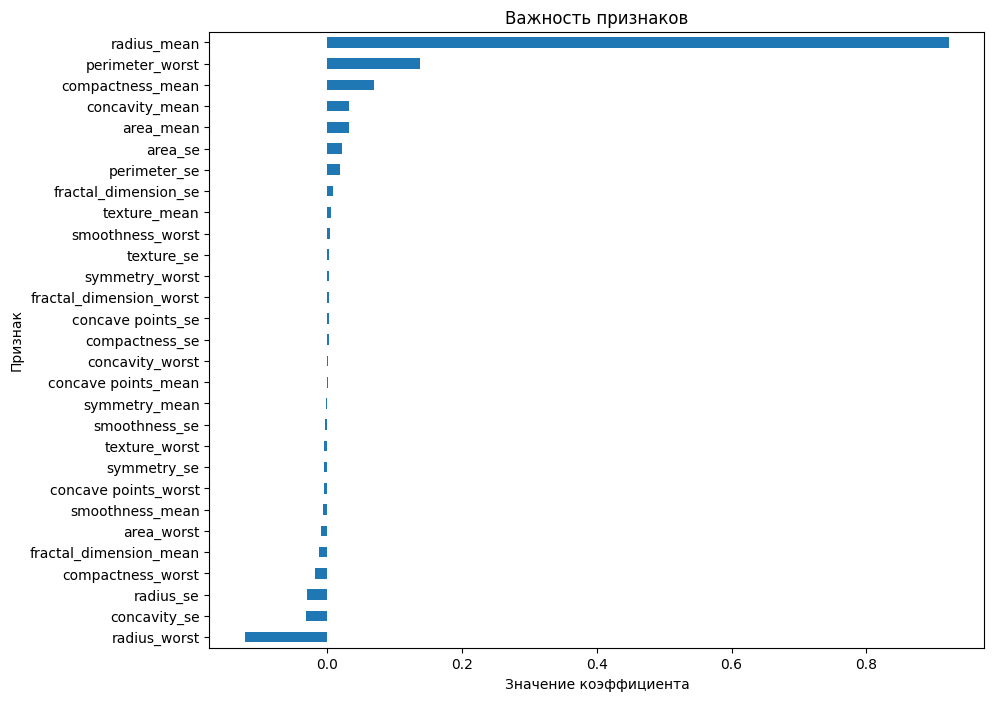

In [131]:
coef_importance = pd.Series(model.coef_, index=X.columns)
coef_importance_sorted = coef_importance.sort_values(ascending=True)

plt.figure(figsize=(10, 8))
coef_importance_sorted.plot(kind='barh')
plt.title('Важность признаков')
plt.xlabel('Значение коэффициента')
plt.ylabel('Признак')
plt.show()

4. Для каждого вида регрессии (`Ridge`, `LASSO`, `Elastic Net`):
   - С использованием `GridSearchCV` осуществить подбор параметров регуляризации (`alpha` для `Ridge` и `LASSO`, `alpha` и `l1_ratio` для `Elastic Net`)
   - Вывести значения гиперпараметров, коэффициенты регрессии (`model.coef_` и `model.intercept_`) и значения метрик на тестовом наборе для наилучшей модели ($MSE$, $MAE$ и $R^2$).
   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).  
   
   > Запомнить лучшие модели для 2 этапа.

In [132]:
best_models = {}

#функция для оценки модели и построения графика
def evaluate_model(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name}")
    print(f"Лучшие параметры: {model.best_params_}")
    print(f"MSE: {mse:.6f}")
    print(f"MAE: {mae:.6f}")
    print(f"R^2: {r2:.6f}")
    best_models_metrics[model_name] = {
        "mse": mse,
        "mae": mae,
        "r2": r2
    }
    print("\nКоэффициенты модели:")
    for feature, coef in zip(X.columns, model.best_estimator_.coef_):
        print(f"{feature}: {coef:.6f}")

    print(f"\nСвободный член (intercept_): {model.best_estimator_.intercept_:.6f}")

    coef_importance = pd.Series(model.best_estimator_.coef_, index=X.columns)
    coef_importance_sorted = coef_importance.sort_values(ascending=True)

    plt.figure(figsize=(10, 8))
    coef_importance_sorted.plot(kind='barh')
    plt.title('Важность признаков')
    plt.xlabel('Значение коэффициента')
    plt.ylabel('Признак')
    plt.show()

    return model.best_estimator_

Ridge
Лучшие параметры: {'alpha': 0.001}
MSE: 0.000012
MAE: 0.002128
R^2: 0.999566

Коэффициенты модели:
radius_mean: 0.886183
texture_mean: 0.005596
area_mean: 0.062959
smoothness_mean: -0.006253
compactness_mean: 0.070060
concavity_mean: 0.032165
concave points_mean: 0.000422
symmetry_mean: -0.002400
fractal_dimension_mean: -0.013200
radius_se: -0.036809
texture_se: 0.003656
perimeter_se: 0.015748
area_se: 0.028588
smoothness_se: -0.003885
compactness_se: 0.002065
concavity_se: -0.033870
concave points_se: 0.004420
symmetry_se: -0.004781
fractal_dimension_se: 0.008977
radius_worst: -0.088988
texture_worst: -0.005777
perimeter_worst: 0.137781
area_worst: -0.039872
smoothness_worst: 0.003386
compactness_worst: -0.018747
concavity_worst: 0.001124
concave points_worst: -0.006547
symmetry_worst: 0.001895
fractal_dimension_worst: 0.001758

Свободный член (intercept_): 0.002013


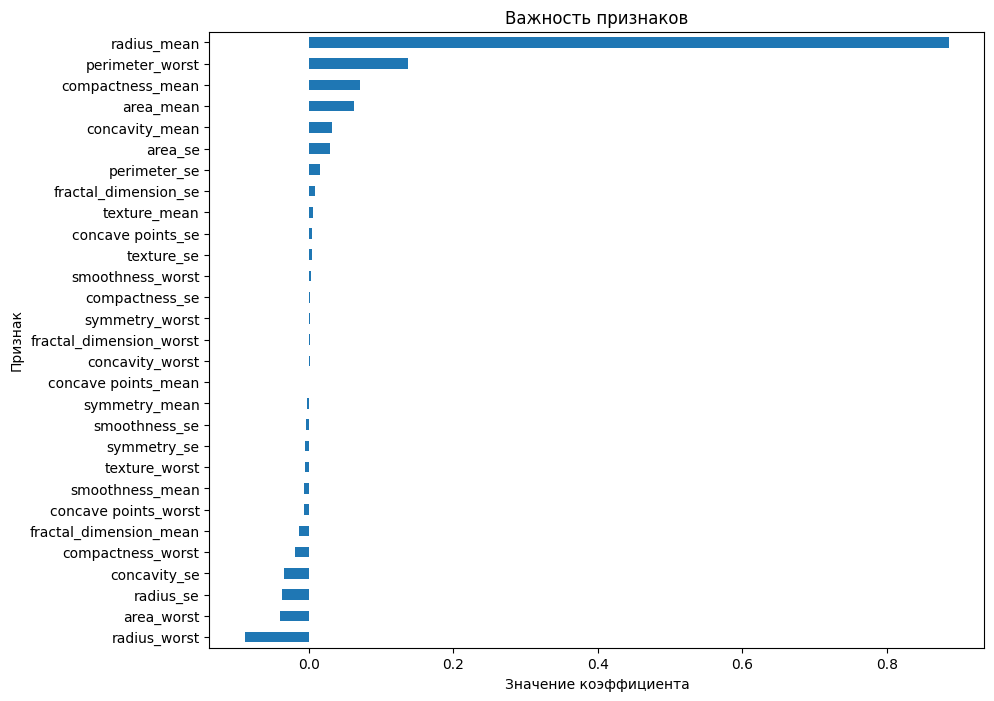

In [133]:
ridge = Ridge()
params_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(ridge, params_ridge, cv=5)
ridge_cv.fit(X_train, y_train)

best_ridge = evaluate_model(ridge_cv, "Ridge", X_test, y_test)
best_models['Ridge'] = best_ridge

Lasso
Лучшие параметры: {'alpha': 0.001}
MSE: 0.000083
MAE: 0.005889
R^2: 0.997031

Коэффициенты модели:
radius_mean: 0.898252
texture_mean: 0.000000
area_mean: 0.000000
smoothness_mean: 0.000000
compactness_mean: 0.000000
concavity_mean: 0.001313
concave points_mean: 0.062606
symmetry_mean: 0.000000
fractal_dimension_mean: -0.000000
radius_se: 0.000000
texture_se: 0.000000
perimeter_se: 0.000000
area_se: 0.000000
smoothness_se: -0.000000
compactness_se: 0.000000
concavity_se: 0.000000
concave points_se: 0.000000
symmetry_se: 0.000000
fractal_dimension_se: 0.000000
radius_worst: 0.000000
texture_worst: 0.000000
perimeter_worst: 0.000000
area_worst: 0.000000
smoothness_worst: 0.000000
compactness_worst: 0.000000
concavity_worst: 0.000000
concave points_worst: 0.010063
symmetry_worst: 0.000000
fractal_dimension_worst: 0.000000

Свободный член (intercept_): 0.009692


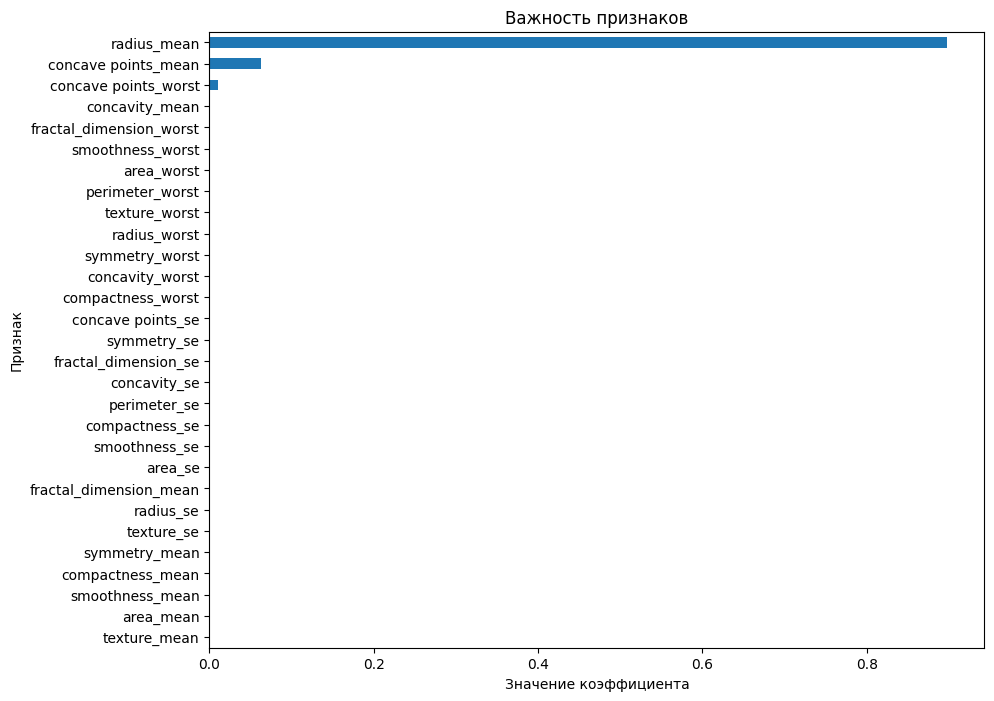

In [134]:
lasso = Lasso()
params_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_cv = GridSearchCV(lasso, params_lasso, cv=5)
lasso_cv.fit(X_train, y_train)

best_lasso = evaluate_model(lasso_cv, "Lasso", X_test, y_test)
best_models['Lasso'] = best_lasso

ElasticNet
Лучшие параметры: {'alpha': 0.001, 'l1_ratio': 0.9}
MSE: 0.000077
MAE: 0.005777
R^2: 0.997254

Коэффициенты модели:
radius_mean: 0.852526
texture_mean: 0.000000
area_mean: 0.000000
smoothness_mean: 0.000000
compactness_mean: 0.000000
concavity_mean: 0.000883
concave points_mean: 0.071388
symmetry_mean: 0.000000
fractal_dimension_mean: -0.000000
radius_se: 0.000000
texture_se: -0.000000
perimeter_se: 0.000000
area_se: 0.000000
smoothness_se: -0.000000
compactness_se: 0.000000
concavity_se: 0.000000
concave points_se: 0.000000
symmetry_se: 0.000000
fractal_dimension_se: 0.000000
radius_worst: 0.000000
texture_worst: 0.000000
perimeter_worst: 0.050237
area_worst: 0.000000
smoothness_worst: -0.000000
compactness_worst: 0.000000
concavity_worst: 0.000000
concave points_worst: 0.000206
symmetry_worst: 0.000000
fractal_dimension_worst: 0.000000

Свободный член (intercept_): 0.012803


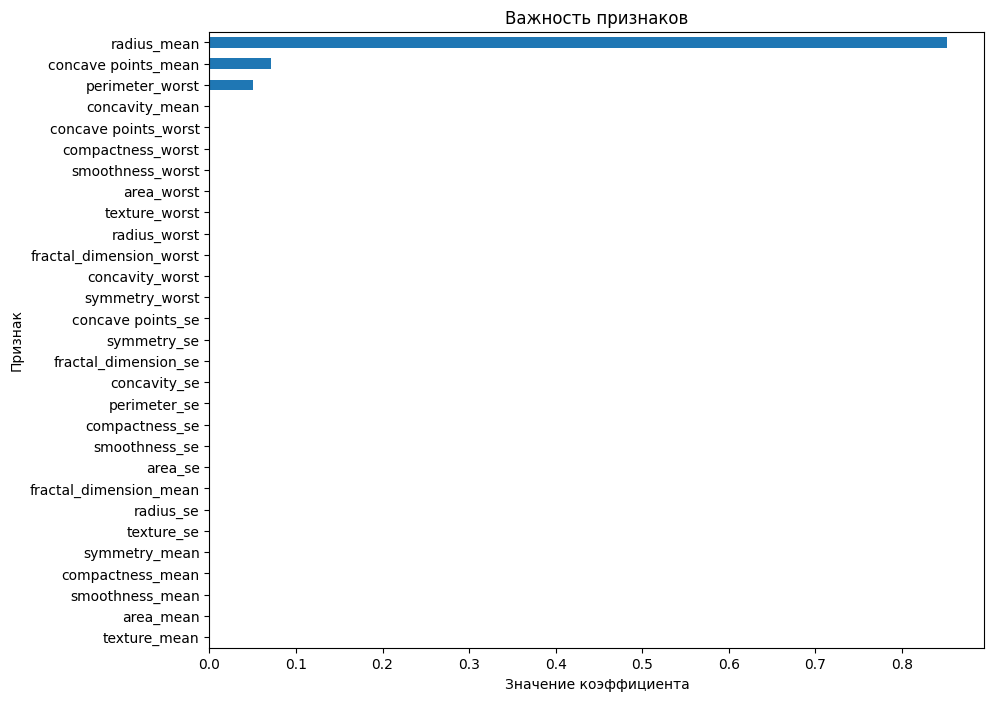

In [135]:
elastic = ElasticNet()
params_elastic = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                  'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
elastic_cv = GridSearchCV(elastic, params_elastic, cv=5)
elastic_cv.fit(X_train, y_train)

best_elastic = evaluate_model(elastic_cv, "ElasticNet", X_test, y_test)
best_models['ElasticNet'] = best_elastic

5. Датасет и подготовка данных, этап 2:
   - Использовать датафреймы после разбиения на обучающую и тестовую выборки из 1 этапа с категориальными признаками.
   - Закодировать категориальные признаки в обучающей и тестовой выборках.
6. Регрессии, этап 2:
   - Обучить `LinearRegression`, лучшие модели `Ridge`, `LASSO`, `Elastic Net` на обучающем наборе с категориальными признаками.
   - Вывести значения гиперпараметров, коэффициенты регрессии (`model.coef_` и `model.intercept_`) и значения метрик на тестовом наборе ($MSE$, $MAE$ и $R^2$).
   - Сравнить метрики с наличием категориальных признаков и без для каждой из моделей.
   - Выбрать лучшую модель.
   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).
   - Осуществить фильтрацию признаков с использованием `Recursive Feature Elimination`.
   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).
   - Вывести значения метрик на тестовом наборе ($MSE$, $MAE$ и $R^2$).

In [136]:
best_models_cat = {}

def fit_and_evaluate(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} (с категориальными признаками)")
    print(f"MSE: {mse:.6f}")
    print(f"MAE: {mae:.6f}")
    print(f"R^2: {r2:.6f}")
    print("\nКоэффициенты модели:")
    for feature, coef in zip(X_cat.columns, model.coef_):
        print(f"{feature}: {coef:.6f}")

    print(f"\nСвободный член (intercept_): {model.intercept_:.6f}")

    coef_importance_cat = pd.Series(model.coef_, index=X_cat.columns)
    coef_importance_sorted_cat = coef_importance_cat.sort_values(ascending=True)

    plt.figure(figsize=(10, 8))
    coef_importance_sorted_cat.plot(kind='barh')
    plt.title('Важность признаков')
    plt.xlabel('Значение коэффициента')
    plt.ylabel('Признак')
    plt.show()

    best_models_cat[model_name] = {
        "mse": mse,
        "mae": mae,
        "r2": r2
    }

    return model

LinearRegression (с категориальными признаками)
MSE: 0.000012
MAE: 0.002125
R^2: 0.999575

Коэффициенты модели:
diagnosis: -0.000431
radius_mean: 0.923577
texture_mean: 0.004830
area_mean: 0.031322
smoothness_mean: -0.006834
compactness_mean: 0.069446
concavity_mean: 0.031900
concave points_mean: 0.000131
symmetry_mean: -0.002814
fractal_dimension_mean: -0.012540
radius_se: -0.030660
texture_se: 0.002936
perimeter_se: 0.018600
area_se: 0.022186
smoothness_se: -0.003769
compactness_se: 0.002402
concavity_se: -0.031740
concave points_se: 0.001943
symmetry_se: -0.005073
fractal_dimension_se: 0.008455
radius_worst: -0.125337
texture_worst: -0.004786
perimeter_worst: 0.137782
area_worst: -0.007698
smoothness_worst: 0.004069
compactness_worst: -0.019450
concavity_worst: 0.000446
concave points_worst: -0.005318
symmetry_worst: 0.002652
fractal_dimension_worst: 0.002547

Свободный член (intercept_): 0.001364


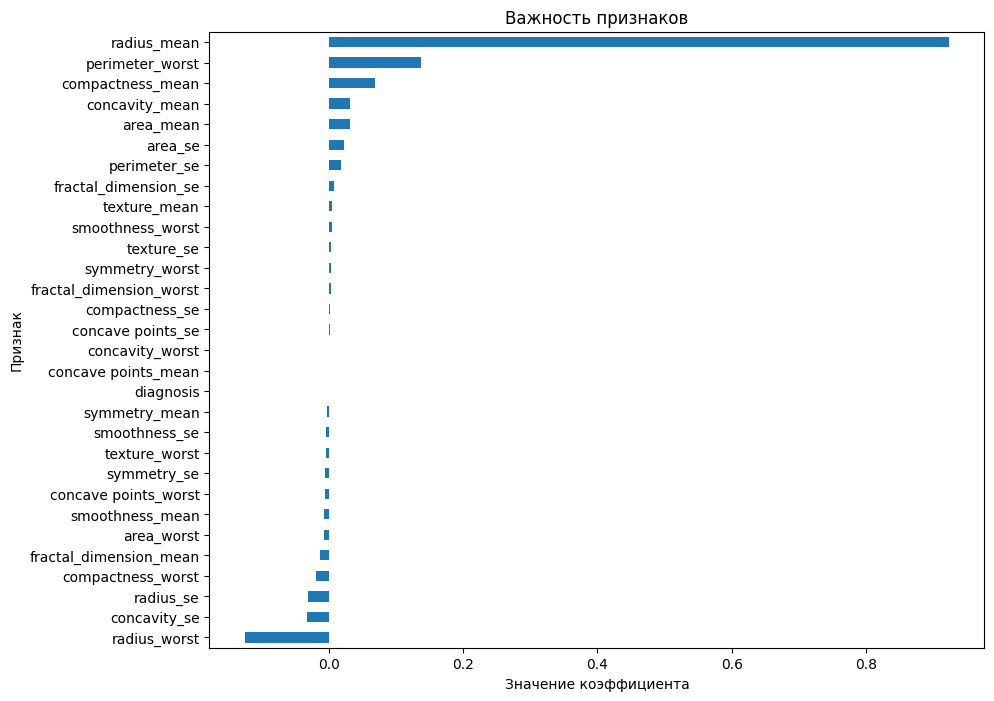

LinearRegression()

In [137]:
lr_cat = LinearRegression()
fit_and_evaluate(lr_cat, "LinearRegression", X_train_cat, X_test_cat, y_train, y_test)

Ridge (с категориальными признаками)
MSE: 0.000012
MAE: 0.002127
R^2: 0.999567

Коэффициенты модели:
diagnosis: -0.000364
radius_mean: 0.886463
texture_mean: 0.005563
area_mean: 0.062744
smoothness_mean: -0.006227
compactness_mean: 0.070570
concavity_mean: 0.031974
concave points_mean: 0.000062
symmetry_mean: -0.002370
fractal_dimension_mean: -0.013284
radius_se: -0.037247
texture_se: 0.003676
perimeter_se: 0.015791
area_se: 0.028838
smoothness_se: -0.004075
compactness_se: 0.002168
concavity_se: -0.033226
concave points_se: 0.004078
symmetry_se: -0.004743
fractal_dimension_se: 0.009002
radius_worst: -0.090872
texture_worst: -0.005907
perimeter_worst: 0.138228
area_worst: -0.038563
smoothness_worst: 0.003372
compactness_worst: -0.019005
concavity_worst: 0.000845
concave points_worst: -0.006407
symmetry_worst: 0.001700
fractal_dimension_worst: 0.001677

Свободный член (intercept_): 0.002643


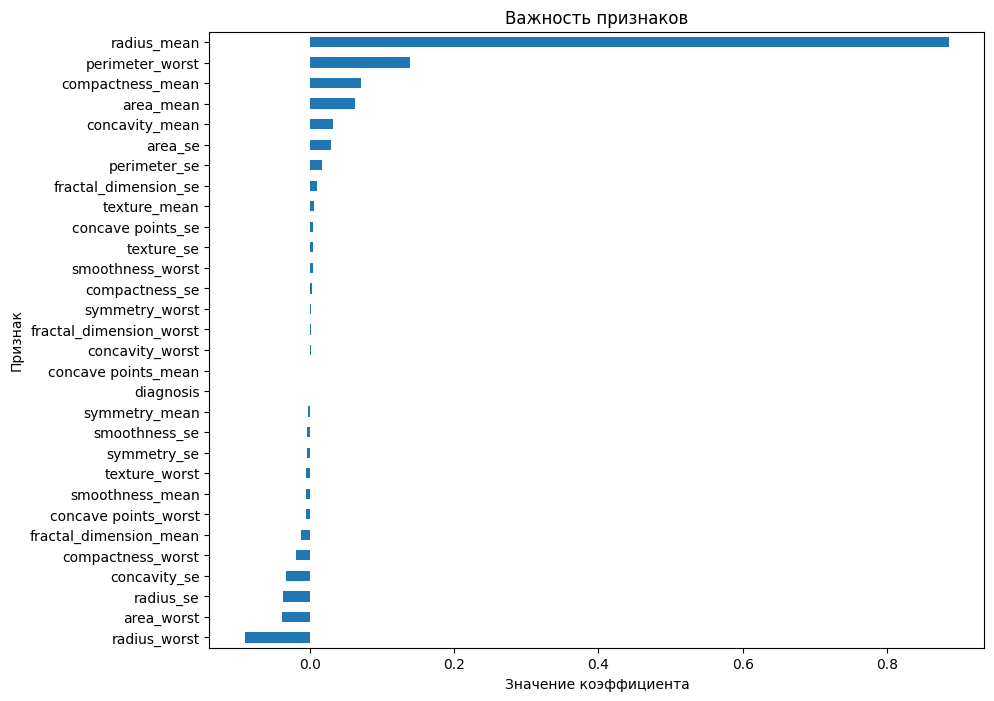

Ridge(alpha=0.001)

In [138]:
ridge_cat = Ridge(alpha=best_models["Ridge"].alpha)
fit_and_evaluate(ridge_cat, "Ridge", X_train_cat, X_test_cat, y_train, y_test)

Lasso (с категориальными признаками)
MSE: 0.000095
MAE: 0.006450
R^2: 0.996594

Коэффициенты модели:
diagnosis: -0.011240
radius_mean: 0.890221
texture_mean: 0.000000
area_mean: 0.000000
smoothness_mean: 0.000000
compactness_mean: 0.000000
concavity_mean: 0.003897
concave points_mean: 0.054542
symmetry_mean: 0.000000
fractal_dimension_mean: 0.000000
radius_se: 0.000000
texture_se: -0.000000
perimeter_se: 0.000000
area_se: 0.000000
smoothness_se: -0.000000
compactness_se: 0.000000
concavity_se: 0.000000
concave points_se: 0.000000
symmetry_se: 0.000000
fractal_dimension_se: 0.000000
radius_worst: 0.000000
texture_worst: 0.000000
perimeter_worst: 0.000000
area_worst: 0.000000
smoothness_worst: 0.000000
compactness_worst: 0.000000
concavity_worst: 0.000000
concave points_worst: 0.000000
symmetry_worst: 0.000000
fractal_dimension_worst: 0.000000

Свободный член (intercept_): 0.024815


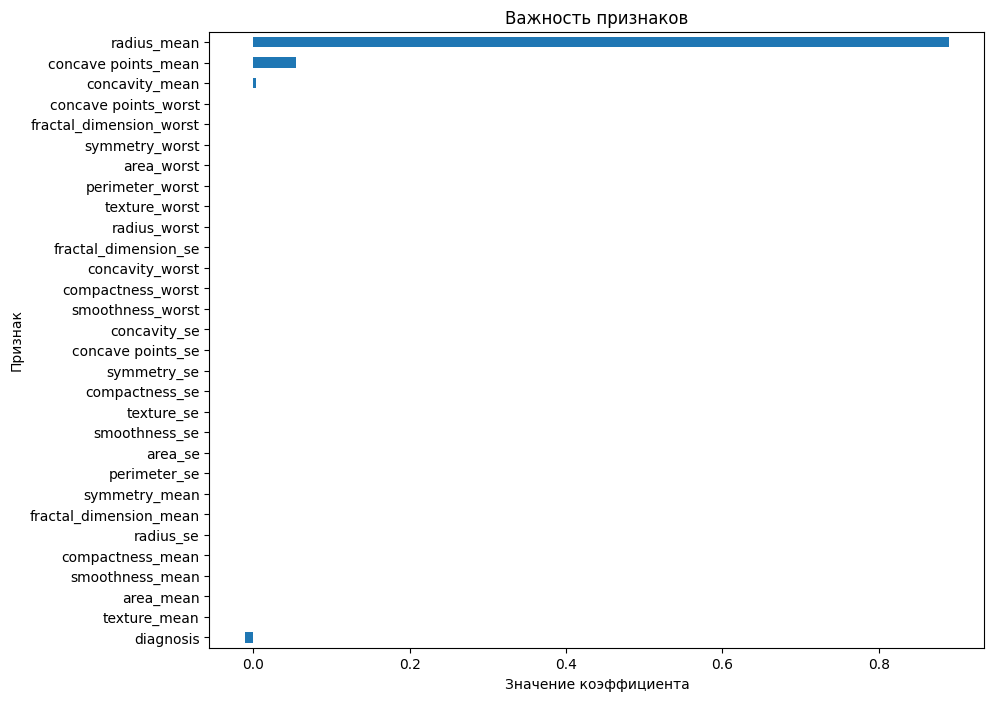

Lasso(alpha=0.001)

In [139]:
lasso_cat = Lasso(alpha=best_models["Lasso"].alpha)
fit_and_evaluate(lasso_cat, "Lasso", X_train_cat, X_test_cat, y_train, y_test)

ElasticNet (с категориальными признаками)
MSE: 0.000089
MAE: 0.006316
R^2: 0.996816

Коэффициенты модели:
diagnosis: -0.009429
radius_mean: 0.858604
texture_mean: 0.000000
area_mean: 0.000000
smoothness_mean: 0.000000
compactness_mean: 0.000000
concavity_mean: 0.001479
concave points_mean: 0.060356
symmetry_mean: 0.000000
fractal_dimension_mean: -0.000000
radius_se: 0.000000
texture_se: -0.000000
perimeter_se: 0.000000
area_se: 0.000000
smoothness_se: -0.000000
compactness_se: 0.000000
concavity_se: 0.000000
concave points_se: 0.000000
symmetry_se: 0.000000
fractal_dimension_se: 0.000000
radius_worst: 0.000000
texture_worst: 0.000000
perimeter_worst: 0.033616
area_worst: 0.000000
smoothness_worst: -0.000000
compactness_worst: 0.000000
concavity_worst: 0.000000
concave points_worst: 0.000000
symmetry_worst: -0.000000
fractal_dimension_worst: 0.000000

Свободный член (intercept_): 0.023973


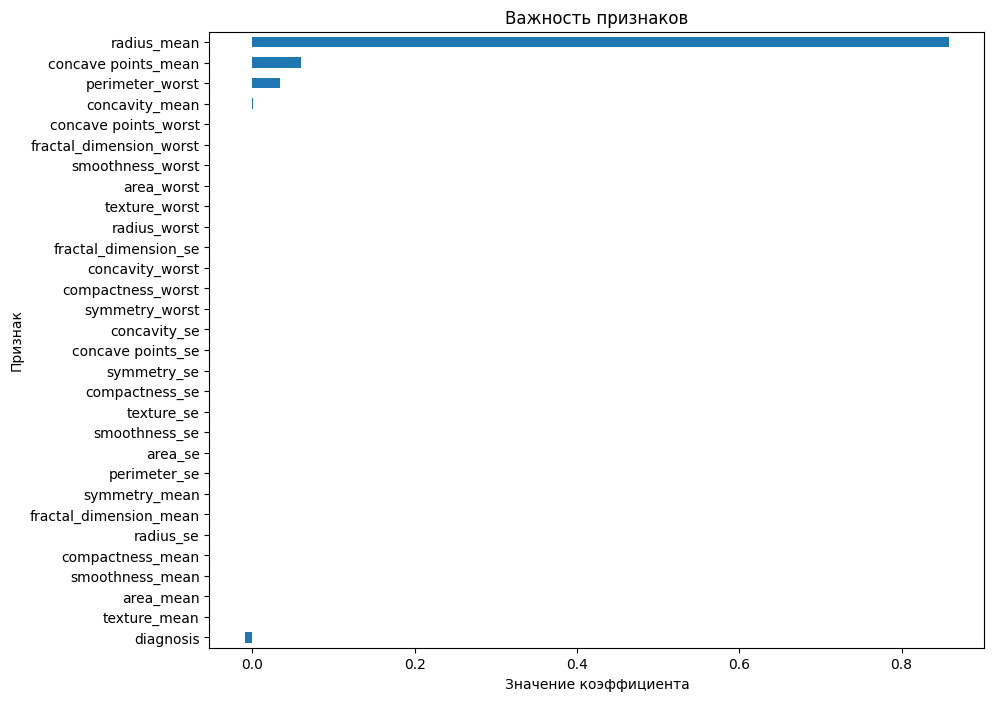

ElasticNet(alpha=0.001, l1_ratio=0.9)

In [140]:
elastic_cat = ElasticNet(alpha=best_models["ElasticNet"].alpha, l1_ratio=best_models["ElasticNet"].l1_ratio)
fit_and_evaluate(elastic_cat, "ElasticNet", X_train_cat, X_test_cat, y_train, y_test)

In [148]:
rows = []
for model in best_models_metrics:
    params = best_models.get(model, "-")

    m = best_models_metrics[model]
    rows.append({
        'Модель': model,
        'Кат. признаки': 'NO',
        'MSE': round(m['mse'], 6),
        'MAE': round(m['mae'], 6),
        'R²': round(m['r2'], 6),
        'Параметры': params
    })

    m_cat = best_models_cat[model]
    rows.append({
        'Модель': model,
        'Кат. признаки': 'YES',
        'MSE': round(m_cat['mse'], 6),
        'MAE': round(m_cat['mae'], 6),
        'R²': round(m_cat['r2'], 6),
        'Параметры': params
    })

df = pd.DataFrame(rows)
df

,Модель,Кат. признаки,MSE,MAE,R²,Параметры
0,LinearRegression,NO,0.000012,0.002129,0.999574,-
1,LinearRegression,YES,0.000012,0.002125,0.999575,-
2,Ridge,NO,0.000012,0.002128,0.999566,Ridge(alpha=0.001)
3,Ridge,YES,0.000012,0.002127,0.999567,Ridge(alpha=0.001)
4,Lasso,NO,0.000083,0.005889,0.997031,Lasso(alpha=0.001)
5,Lasso,YES,0.000095,0.006450,0.996594,Lasso(alpha=0.001)
6,ElasticNet,NO,0.000077,0.005777,0.997254,"ElasticNet(alpha=0.001, l1_ratio=0.9)"
7,ElasticNet,YES,0.000089,0.006316,0.996816,"ElasticNet(alpha=0.001, l1_ratio=0.9)"


In [151]:
best_r2 = df.loc[df['R²'].idxmax()]
best_mae = df.loc[df['MAE'].idxmin()]
best_mse = df.loc[df['MSE'].idxmin()]

print("Лучшая модель по R²:")
print(best_r2[['Модель', 'Кат. признаки', 'R²']])
print("\nЛучшая модель по MAE:")
print(best_mae[['Модель', 'Кат. признаки', 'MAE']])
print("\nЛучшая модель по MSE:")
print(best_mse[['Модель', 'Кат. признаки', 'MSE']])

Лучшая модель по R²:
Модель           LinearRegression
Кат. признаки                 YES
R²                       0.999575
Name: 1, dtype: object

Лучшая модель по MAE:
Модель           LinearRegression
Кат. признаки                 YES
MAE                      0.002125
Name: 1, dtype: object

Лучшая модель по MSE:
Модель           LinearRegression
Кат. признаки                  NO
MSE                      0.000012
Name: 0, dtype: object


In [154]:
from sklearn.feature_selection import RFE

lr_best = LinearRegression()

rfe = RFE(estimator=lr_best, n_features_to_select=10)
rfe.fit(X_train_cat, y_train)

selected_features = X_train_cat.columns[rfe.support_]
print("Отобранные признаки (RFE):")
print(list(selected_features))

Отобранные признаки (RFE):
['radius_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'radius_se', 'perimeter_se', 'area_se', 'concavity_se', 'radius_worst', 'perimeter_worst']


In [159]:
X_train_rfe = X_train_cat[selected_features]
X_test_rfe = X_test_cat[selected_features]

lr_best.fit(X_train_rfe, y_train)
y_pred_rfe = lr_best.predict(X_test_rfe)

mse_rfe = mean_squared_error(y_test, y_pred_rfe)
mae_rfe = mean_absolute_error(y_test, y_pred_rfe)
r2_rfe = r2_score(y_test, y_pred_rfe)

print("Метрики модели LinearRegression после RFE:")
print(f"MSE: {mse_rfe:.6f}")
print(f"MAE: {mae_rfe:.6f}")
print(f"R^2: {r2_rfe:.6f}")

print("\nКоэффициенты модели:")
for feature, coef in zip(selected_features, lr_best.coef_):
    print(f"{feature}: {coef:.6f}")

print(f"\nСвободный член (intercept_): {lr_best.intercept_:.6f}")

Метрики модели LinearRegression после RFE:
MSE: 0.000011
MAE: 0.002002
R^2: 0.999590

Коэффициенты модели:
radius_mean: 0.952851
area_mean: 0.022558
compactness_mean: 0.044270
concavity_mean: 0.026229
radius_se: -0.018309
perimeter_se: 0.021819
area_se: 0.011342
concavity_se: -0.022626
radius_worst: -0.140650
perimeter_worst: 0.131611

Свободный член (intercept_): -0.005964


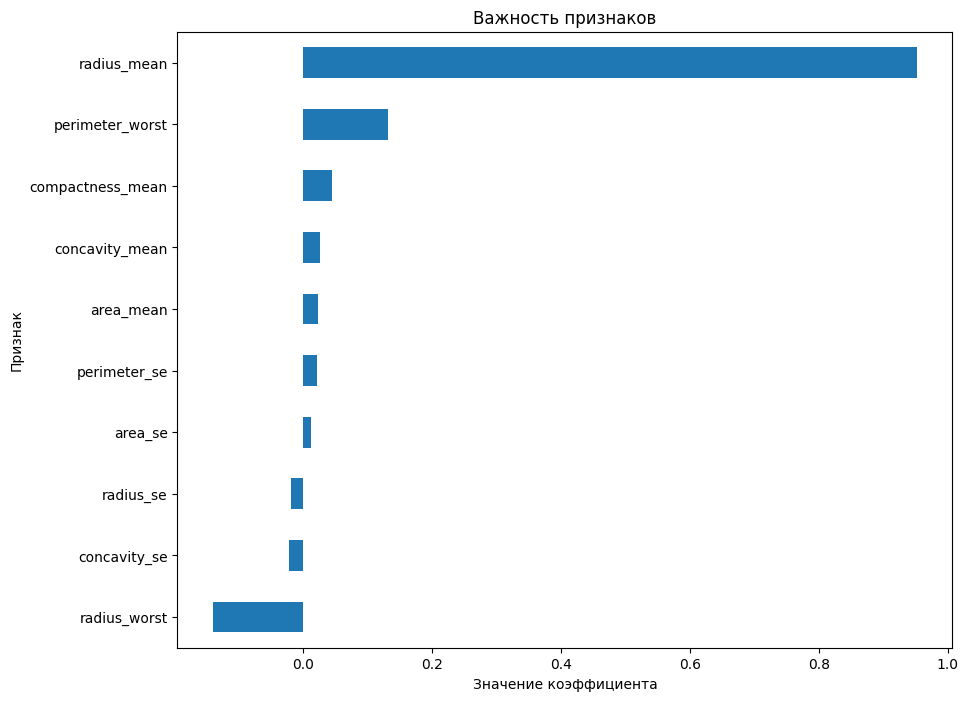

In [160]:
coef_importance = pd.Series(lr_best.coef_, index=selected_features)
coef_importance_sorted = coef_importance.sort_values(ascending=True)

plt.figure(figsize=(10, 8))
coef_importance_sorted.plot(kind='barh')
plt.title('Важность признаков')
plt.xlabel('Значение коэффициента')
plt.ylabel('Признак')
plt.show()

7. Сделать вывод:
   - Лучший регрессор, обученный на данных без категориальных признаков (значения метрик на тестовом наборе).
   - Лучший регрессор, обученный на данных с категориальными признаками (значения метрик на тестовом наборе).
   - Вывод о результатах использования `Recursive Feature Elimination` (лучше или хуже - значения метрик).

In [165]:
df_with_cat = df[df['Кат. признаки'] == 'YES']
df_without_cat = df[df['Кат. признаки'] == 'NO']

best_r2_without = df_without_cat.loc[df_without_cat['R²'].idxmax()]
best_mae_without = df_without_cat.loc[df_without_cat['MAE'].idxmin()]
best_mse_without = df_without_cat.loc[df_without_cat['MSE'].idxmin()]

best_r2_with = df_with_cat.loc[df_with_cat['R²'].idxmax()]
best_mae_with = df_with_cat.loc[df_with_cat['MAE'].idxmin()]
best_mse_with = df_with_cat.loc[df_with_cat['MSE'].idxmin()]

print("ЛУЧШИЕ МОДЕЛИ БЕЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ:\n")
print("По R^2:")
print(best_r2_without[['Модель']])
print("\nПо MAE:")
print(best_mae_without[['Модель']])
print("\nПо MSE:")
print(best_mse_without[['Модель']])

print("\n\nЛУЧШИЕ МОДЕЛИ С КАТЕГОРИАЛЬНЫМИ ПРИЗНАКАМИ:\n")
print("По R^2:")
print(best_r2_with[['Модель']])
print("\nПо MAE:")
print(best_mae_with[['Модель']])
print("\nПо MSE:")
print(best_mse_with[['Модель']])

ЛУЧШИЕ МОДЕЛИ БЕЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ:

По R^2:
Модель    LinearRegression
Name: 0, dtype: object

По MAE:
Модель    Ridge
Name: 2, dtype: object

По MSE:
Модель    LinearRegression
Name: 0, dtype: object


ЛУЧШИЕ МОДЕЛИ С КАТЕГОРИАЛЬНЫМИ ПРИЗНАКАМИ:

По R^2:
Модель    LinearRegression
Name: 1, dtype: object

По MAE:
Модель    LinearRegression
Name: 1, dtype: object

По MSE:
Модель    LinearRegression
Name: 1, dtype: object


In [167]:
print("Метрики модели LinearRegression после RFE:")
print(f"MSE: {mse_rfe:.6f}")
print(f"MAE: {mae_rfe:.6f}")
print(f"R^2: {r2_rfe:.6f}")

mse = df.loc[1, 'MSE']
mae = df.loc[1, 'MAE']
r2 = df.loc[1, 'R²']

print("\nМетрики модели LinearRegression без RFE:")
print(f"MSE: {mse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"R^2: {r2:.6f}")

Метрики модели LinearRegression после RFE:
MSE: 0.000011
MAE: 0.002002
R^2: 0.999590

Метрики модели LinearRegression без RFE:
MSE: 0.000012
MAE: 0.002125
R^2: 0.999575
